In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [183]:
df = pd.read_csv('nations.csv',encoding='ISO-8859-1', index_col=["Unnamed: 0"])
df

,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
1,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.00,NaN
2,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.20,NaN
3,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.20,NaN
4,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.20,NaN
5,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.10,33.299999
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Samoa,Oceania,4012.600098,10.300000,28.299999,26.75,71.533333,181600,20.666668,0.5010,98.800003,3.10,NaN
191,Solomon Islands,Oceania,2249.199951,4.500000,70.300003,36.00,66.500000,503617,17.766666,0.4858,NaN,1.40,NaN
192,Tonga,Oceania,4072.199951,10.133333,22.299999,19.25,71.833336,102550,23.266666,0.7150,99.000000,4.85,NaN
193,Tuvalu,Oceania,NaN,NaN,23.299999,36.50,66.033333,9767,49.233334,NaN,NaN,NaN,NaN


In [184]:
df.region.unique()

array(['Africa', 'Americas', 'Asia', 'Europe', 'Oceania'], dtype=object)

In [185]:
apellidos_a_m = ["chldmort", "adfert", "life"]
apellidos_n_z = ["femlab", "literacy", "school"]
df_apellido = df[apellidos_a_m]

regiones = df.region.unique()
df_region = df.loc[:,['country']]
for region in regiones:
    df_region[region] = np.where(df['region'] == region, True, False)

df_nuevo = pd.concat([df_region, df_apellido], axis=1)
df_nuevo

,country,Africa,Americas,Asia,Europe,Oceania,chldmort,adfert,life
1,Algeria,True,False,False,False,False,34.75,7.300000,72.316666
2,Benin,True,False,False,False,False,122.75,111.699997,54.733334
3,Botswana,True,False,False,False,False,60.25,52.099998,52.250000
4,Burkina Faso,True,False,False,False,False,170.50,124.800003,53.783333
5,Burundi,True,False,False,False,False,168.50,18.600000,48.866665
...,...,...,...,...,...,...,...,...,...
190,Samoa,False,False,False,False,True,26.75,28.299999,71.533333
191,Solomon Islands,False,False,False,False,True,36.00,70.300003,66.500000
192,Tonga,False,False,False,False,True,19.25,22.299999,71.833336
193,Tuvalu,False,False,False,False,True,36.50,23.299999,66.033333


In [196]:
from scipy.stats import ttest_ind

def test_hipotesis(df, variable, binarize):
    region = df.loc[df[binarize],:].dropna(subset=[variable])
    not_region = df.loc[~df[binarize],:].dropna(subset=[variable])
    t, p = ttest_ind(region[variable], not_region[variable]);
    print(f"La media de la variable {variable} en la región {binarize} es {region[variable].mean():.2f}")
    print(f"La media de la variable {variable} fuera de la región {binarize} es {not_region[variable].mean():.2f}")
    print(f"La diferencia entre las medias es {abs(region[variable].mean() - not_region[variable].mean()):.2f}")
    print(f"El p-value es {p*100:.8f}%")
    print(f"El t-statistic es {t:.8f}")

In [197]:
test_hipotesis(df_nuevo,'chldmort','Oceania');

La media de la variable chldmort en la región Oceania es 39.42
La media de la variable chldmort fuera de la región Oceania es 48.34
La diferencia entre las medias es 8.93
El p-value es 53.08992372%
El t-statistic es -0.62777797


In [188]:
def graficar_hist_clase(df, variable, binarize):
    region = df.loc[df[binarize],:].dropna(subset=[variable])
    not_region = df.loc[~df[binarize],:].dropna(subset=[variable])
    # plt.hist(region[variable], bins=20, alpha=0.5, label=f"{binarize}")
    # plt.hist(not_region[variable], bins=20, alpha=0.5, label=f"No {binarize}")
    sns.displot(x=variable,data=df, kde=False,aspect=2, hue=binarize, bins = 20)
    plt.title(f"Histograma de la variable {variable} en la región {binarize}")
    plt.legend(labels=[f"{binarize}",f"No {binarize}"])
    plt.show()

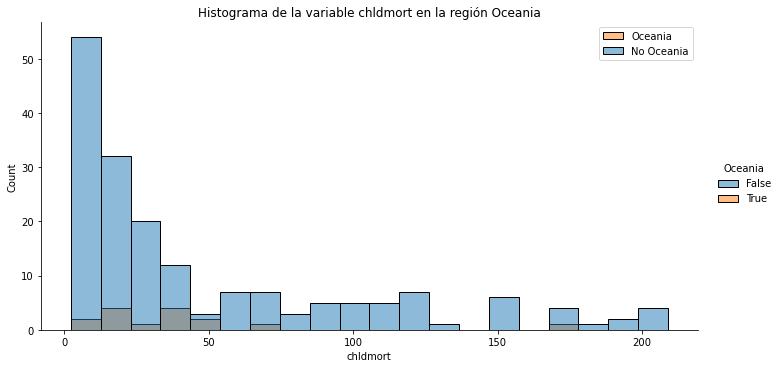

In [189]:
graficar_hist_clase(df_nuevo,'chldmort','Oceania');